# This project is to analyze the covid-19 according to different countries

In [1]:
# Importing Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# loding csv file
covid = pd.read_csv("covid19.csv")
covid.head() # Visulizing the DataFrame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328


In [3]:
covid.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3897.000000,3897.000000,3.984000e+03,3984.000000,3.984000e+03,3.983000e+03,3895.000000,3940.000000
mean,32386.688208,35.973564,-72.005376,2.110788e+04,474.467620,1.187575e+04,8.748282e+03,5770.649567,1.939365
std,18017.294540,13.043953,53.751137,1.057523e+05,2729.271632,8.221851e+04,6.180559e+04,3208.655754,5.493363
min,66.000000,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-1.083768e+06,0.000000,0.000000
25%,19049.000000,33.268798,-96.616867,7.000000e+02,9.000000,0.000000e+00,5.910000e+02,3599.272506,0.969272
50%,30067.000000,37.946365,-86.854759,1.964000e+03,32.000000,0.000000e+00,1.663000e+03,5851.131858,1.540464
75%,47039.000000,42.220792,-77.492245,7.721750e+03,114.000000,0.000000e+00,4.926000e+03,7762.999138,2.310092
max,99999.000000,71.706900,178.065000,2.636045e+06,64731.000000,2.114760e+06,2.400750e+06,27388.219766,271.875000


In [4]:
# Details about column data
covid.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3811 non-null   object 
 3   Country_Region       3984 non-null   object 
 4   Last_Update          3984 non-null   object 
 5   Lat                  3897 non-null   float64
 6   Long_                3897 non-null   float64
 7   Confirmed            3984 non-null   int64  
 8   Deaths               3984 non-null   int64  
 9   Recovered            3984 non-null   int64  
 10  Active               3983 non-null   float64
 11  Combined_Key         3984 non-null   object 
 12  Incident_Rate        3895 non-null   float64
 13  Case_Fatality_Ratio  3940 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.9+ KB


In [5]:
# checking for null value
covid.isnull().sum()

FIPS                   719
Admin2                 714
Province_State         173
Country_Region           0
Last_Update              0
Lat                     87
Long_                   87
Confirmed                0
Deaths                   0
Recovered                0
Active                   1
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     44
dtype: int64

In [6]:
# Searching for null value in active column
active_column_null = covid["Active"].isnull()
covid[active_column_null]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
78,NaN,NaN,Diamond Princess,Canada,2020-12-21 13:27:30,NaN,NaN,0,1,0,NaN,"Diamond Princess, Canada",NaN,NaN


In [7]:
active_column_null_index = covid[active_column_null].index
active_column_null_index

Int64Index([78], dtype='int64')

In [8]:
# filling the null value of "Active" column with zero
for i in active_column_null_index:
    covid["Active"][i] = 0
covid[active_column_null]

C:\Users\Lalit\AppData\Local\Temp/ipykernel_17872/1769415792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Active"][i] = 0


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
78,NaN,NaN,Diamond Princess,Canada,2020-12-21 13:27:30,NaN,NaN,0,1,0,0.0,"Diamond Princess, Canada",NaN,NaN


Text(0.5, 0, 'log(cases)')

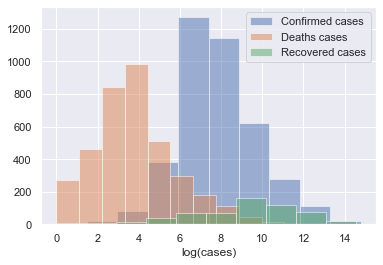

In [9]:
for col in ["Confirmed","Deaths","Recovered"] :
    d_m = (covid[col] > 0)
    d = np.log(covid[col][d_m])
    plt.hist(d, alpha = 0.5, label = col + " cases")
plt.legend()
plt.xlabel("log(cases)")

Text(0, 0.5, 'Density')

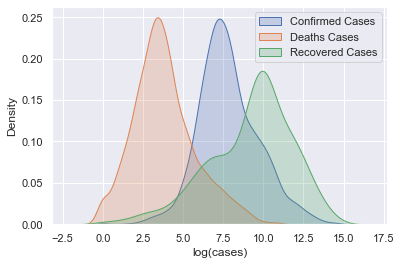

In [10]:
for col in ["Confirmed","Deaths","Recovered"] :
    d_m = (covid[col] > 0)
    d = np.log(covid[col][d_m])
    sns.kdeplot(d, shade = True, label = col + " Cases")
plt.legend()
plt.xlabel("log(cases)")
plt.ylabel("Density")

In [11]:
rank_confirm_cases = covid
duplicate = rank_confirm_cases.duplicated()   # Searching for duplicates if there is any duplicated value
rank_confirm_cases[duplicate]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio


In [12]:
country = rank_confirm_cases["Country_Region"].unique()
country

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
Confirmed = []
Deaths = []
Recovered = []

In [14]:
def addProvice(covid_data, countries):
    for coun in countries:
        c = (covid_data["Country_Region"] == coun)
        confirm = covid_data["Confirmed"][c].sum()
        death = covid_data["Deaths"][c].sum()
        recover = covid_data["Recovered"][c].sum()
        Confirmed.append(confirm)
        Deaths.append(death)
        Recovered.append(recover)

In [15]:
addProvice(rank_confirm_cases,country)

In [16]:
covid_new_data = {
    'Country_Region' : country,
    'Confirmed': Confirmed,
    'Deaths': Deaths,
    'Recovered':Recovered 
}

In [17]:
covid_new_DataFrame = pd.DataFrame(covid_new_data)
covid_new_DataFrame1 = pd.DataFrame(covid_new_data)
covid_new_DataFrame

,Country_Region,Confirmed,Deaths,Recovered
0,Afghanistan,51526,2191,41727
1,Albania,58316,1181,33634
2,Algeria,99897,2762,67395
3,Andorra,8117,84,7463
4,Angola,17568,405,11146
...,...,...,...,...
189,Zambia,20997,390,18773
190,Zimbabwe,14084,369,11347
191,Kiribati,0,0,0
192,Palau,0,0,0


In [18]:
# Top 10 countries ranked by Confirmed cases 
covid_new_DataFrame.sort_values(by="Confirmed", ascending = False, inplace = True)
covid_new_DataFrame.head(10)

,Country_Region,Confirmed,Deaths,Recovered
177,US,20254160,354366,0
79,India,10286709,148994,9883461
23,Brazil,7700578,195411,6855372
141,Russia,3153960,56798,2553467
62,France,2697014,64892,200822
181,United Kingdom,2549693,74237,5682
176,Turkey,2220855,21093,2114760
85,Italy,2129376,74621,1479988
161,Spain,1928265,50837,150376
66,Germany,1762637,34145,1388744


In [19]:
# Finding for the values which have confirmed and death case zero
non_zero_confirmed = ((covid_new_DataFrame["Confirmed"] == 0) | (covid_new_DataFrame["Deaths"] ==0))
non_zero_confirmed_cases = covid_new_DataFrame[non_zero_confirmed]
non_zero_confirmed_cases

,Country_Region,Confirmed,Deaths,Recovered
19,Bhutan,689,0,449
30,Cambodia,379,0,362
152,Seychelles,256,0,214
69,Grenada,127,0,107
145,Saint Vincent and the Grenadines,121,0,98
50,Dominica,88,0,83
172,Timor-Leste,44,0,32
95,Laos,41,0,40
143,Saint Kitts and Nevis,32,0,29
75,Holy See,27,0,15


In [20]:
# deleting the row having confirmed and deaths cases 0
covid_new_DataFrame.drop(non_zero_confirmed_cases.index, inplace = True)

In [21]:
non_zero_confirmed = ((covid_new_DataFrame["Confirmed"] == 0) | (covid_new_DataFrame["Deaths"] ==0))
non_zero_confirmed_cases = covid_new_DataFrame[non_zero_confirmed]
non_zero_confirmed_cases

,Country_Region,Confirmed,Deaths,Recovered


In [22]:
# 5 countries with the least non-zero Confirmed cases
l = len(covid_new_DataFrame)

covid_new_DataFrame.tail(5)

,Country_Region,Confirmed,Deaths,Recovered
144,Saint Lucia,353,5,289
5,Antigua and Barbuda,159,5,148
24,Brunei,157,3,149
60,Fiji,49,2,44
104,MS Zaandam,9,2,7


In [23]:
covid_new_DataFrame["Fatality Percentage"] = (covid_new_DataFrame["Deaths"] / covid_new_DataFrame["Confirmed"]) * 100
covid_new_DataFrame

,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
177,US,20254160,354366,0,1.749596
79,India,10286709,148994,9883461,1.448413
23,Brazil,7700578,195411,6855372,2.537615
141,Russia,3153960,56798,2553467,1.800847
62,France,2697014,64892,200822,2.406068
...,...,...,...,...,...
144,Saint Lucia,353,5,289,1.416431
5,Antigua and Barbuda,159,5,148,3.144654
24,Brunei,157,3,149,1.910828
60,Fiji,49,2,44,4.081633


In [24]:
rank_Fatality_Percentage = covid_new_DataFrame.sort_values(by="Fatality Percentage", ascending = False)
rank_Fatality_Percentage

,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
188,Yemen,2101,610,1396,29.033793
104,MS Zaandam,9,2,7,22.222222
135,Peru,1015137,93231,951318,9.184081
114,Mexico,1437185,126507,1083768,8.802416
52,Ecuador,213378,14051,184507,6.585028
...,...,...,...,...,...
28,Burundi,822,2,687,0.243309
56,Eritrea,1320,3,643,0.227273
139,Qatar,144042,245,141556,0.170089
117,Mongolia,1242,1,855,0.080515


In [25]:
# countries that have more than 2 million Confirmed cases, ranked by ‘Fatality Percentage’ 
rank_Fatality_Percentage_over_2million = rank_Fatality_Percentage[(rank_Fatality_Percentage["Confirmed"] >= 2000000)]
rank_Fatality_Percentage_over_2million

,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
85,Italy,2129376,74621,1479988,3.504360
181,United Kingdom,2549693,74237,5682,2.911605
23,Brazil,7700578,195411,6855372,2.537615
62,France,2697014,64892,200822,2.406068
141,Russia,3153960,56798,2553467,1.800847
177,US,20254160,354366,0,1.749596
79,India,10286709,148994,9883461,1.448413
176,Turkey,2220855,21093,2114760,0.949769


In [26]:
# Function to return specific country wiste state data
def findProvince_State(covid_data_df, country_reg):
    c_reg = (covid_data_df["Country_Region"] == country_reg)
    c_state = covid_data_df["Province_State"][c_reg]
    unique_Province_State = c_state.unique()
    confirm = []
    death = []
    recover = []
    for state in unique_Province_State:
        c_stateWise = (covid_data_df["Province_State"] == state)
        confirm.append(covid_data_df["Confirmed"][c_stateWise].sum())
        death.append(covid_data_df["Deaths"][c_stateWise].sum())
        recover.append(covid_data_df["Recovered"][c_stateWise].sum())
    covid_state_data = {
    'Province_State' : unique_Province_State,
    'Confirmed': confirm,
    'Deaths': death,
    'Recovered':recover 
    }
    countryDataFrame = pd.DataFrame(covid_state_data)
    return countryDataFrame

In [27]:
countryDF = findProvince_State(rank_confirm_cases,"US")
countryDF.head(10)

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,365747,4872,0
1,Alaska,47019,206,0
2,Arizona,530267,9015,0
3,Arkansas,229442,3711,0
4,California,2365024,26424,0
5,Colorado,337161,4873,0
6,Connecticut,185708,5995,0
7,Delaware,58064,1065,0
8,Diamond Princess,49,1,0
9,District of Columbia,29252,788,0


In [28]:
# Top 10 US states ranked by Confirmed cases 
countryDF.sort_values(by="Confirmed", ascending = False, inplace = True)
countryDF[["Province_State","Confirmed","Deaths"]].head(10)

,Province_State,Confirmed,Deaths
4,California,2365024,26424
49,Texas,1782956,28359
10,Florida,1323315,21673
35,New York,995816,38155
16,Illinois,963389,17978
39,Ohio,700380,13746
11,Georgia,677589,10958
42,Pennsylvania,653260,16245
48,Tennessee,586802,6907
36,North Carolina,539545,6748


In [29]:
# Top 5 Countries ranked by death
country_rank_by_death = covid_new_DataFrame.sort_values(by="Deaths", ascending = False)
top_five_country_rank_by_death = country_rank_by_death[["Country_Region","Deaths"]].head(5)
top_five_country_rank_by_death

,Country_Region,Deaths
177,US,354366
23,Brazil,195411
79,India,148994
114,Mexico,126507
135,Peru,93231


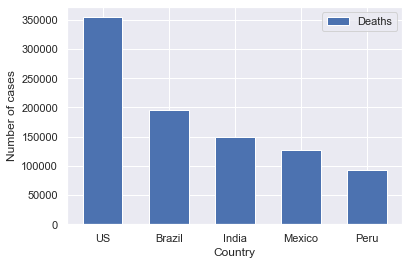

In [30]:
plt.bar(top_five_country_rank_by_death["Country_Region"], top_five_country_rank_by_death["Deaths"], width = 0.6)
plt.xlabel("Country")
plt.ylabel("Number of cases")
plt.legend(labels = ['Deaths'])
plt.show()

In [31]:
# list of countries with non-zero Deaths cases in which all the cases of Covid recovered
country_with_No_Death = ((covid_new_DataFrame1["Confirmed"] == covid_new_DataFrame1["Recovered"]) & (covid_new_DataFrame1["Confirmed"] != 0) &  (covid_new_DataFrame1["Recovered"] != 0))
country_with_No_Death = covid_new_DataFrame1[country_with_No_Death]
country_with_No_Death

,Country_Region,Confirmed,Deaths,Recovered
111,Marshall Islands,4,0,4
146,Samoa,2,0,2
184,Vanuatu,1,0,1
